In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns

## Preparing the data

In [ ]:
df = pd.read_csv('data_science_challenge.csv', encoding='ISO-8859-1')
df.drop('Unnamed: 3', axis=1, inplace=True)
df.drop('Unnamed: 4', axis=1, inplace=True)
df.drop('Unnamed: 5', axis=1, inplace=True)
df.drop('Unnamed: 16', axis=1, inplace=True)
df.drop('Unnamed: 11', axis=1, inplace=True)

# drop the first row
df = df.drop(0)

# rename the columns
df = df.rename(columns={
    '?/$': 'Cost'   
})

# assign new column names to the 'Unnamed: 0' and 'Unnamed: 1' columns
df.columns.values[0] = 'Date'
df.columns.values[1] = 'Time'

for col in df.columns:
    if col not in ['Date', 'Time']:
        df[col] = df[col].str.replace(',', '').astype(float)

# Convert the Date and Time columns to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'])

# Extract year, month, day, and hour information from Date and Time columns
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Hour'] = df['Time'].dt.hour

df.drop('Date', axis=1, inplace=True)
df.drop('Time', axis=1, inplace=True)


df = df.dropna()

## Data Visualisation

In [ ]:

# visualize the dataset to gain insights into the relationships between the various features
sns.lmplot(x='Prognose_Verbrauch_DE', y = 'Spotmarktpreis', data= df, fit_reg=True, ci = None,line_kws={'color': 'Black'})

## Data Training

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Spotmarktpreis', axis=1), df['Spotmarktpreis'], test_size=0.2, random_state=42)

# Train a RandomForestRegressor model on the training data
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict the electricity prices on the testing data
y_pred = model.predict(X_test)

## Predictions

In [ ]:
# make predictions on new data using the trained model
# make predictions on new data using the trained model
new_data = pd.DataFrame({
    'Prognose_Verbrauch_DE': [10000],
    'Prognose_Solar_DE': [500],
    'Prognose_Wind_Offshore_DE': [1000],
    'Prognose_Wind_Onshore_DE': [2000],
    'Prognose_Temperatur_DE': [10],
    'Prognose_Verbrauc_Fr': [8000],
    'Prognose_Solar_Fr': [100],
    'Prognose_Wind_Onshore_Fr': [1000],
    'Prognose_Temperatur_Fr': [15],
    'Kohle': [30],
    'Gas': [20],
    'CO2': [50],
    'Cost': [0],
    'Year':	[2018],
    'Month':[9],
    'Day':[18],
    'Hour':[20]

})

prediction = model.predict(new_data)
print(f"Predicted Spotmarktpreis: {prediction[0]:.2f}€")

## Performance

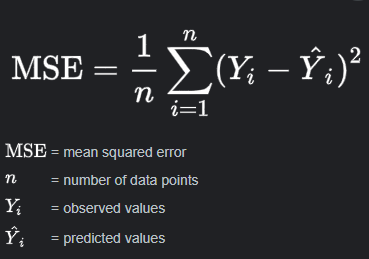

In [ ]:
# evaluate the performance of the model on the testing set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
